In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

## Introduction

In [2]:
# import snaptocmap as sn
from functions import convert_to_cmap
from classes import CMap

`snaptocmap` reads files into a native `CMap` object. This handles the parsing and extraction of colors into colormaps.

In [3]:
fname = 'vangogh.jpg'

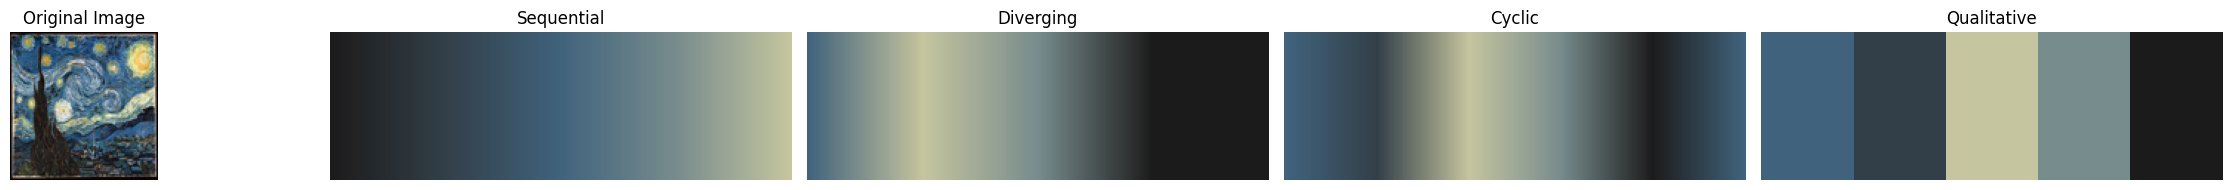

In [4]:
# display all colormaps available
vangogh_obj = CMap(f'images/{fname}')
vangogh_obj.display_all_cmaps()

For a one-line conversion of an image to a colormap, the `convert_to_cmap` function can be used

In [5]:
# one-liner for conversion of image to cmap
vangogh = convert_to_cmap(f'images/{fname}')

## Examples plots
Below are some examples on usage of snaptocmap across `matplotlib`, `seaborn`, and `plotly`

### matplotlib

In [6]:
vangogh_mpl = convert_to_cmap(f'images/{fname}', library='matplotlib')

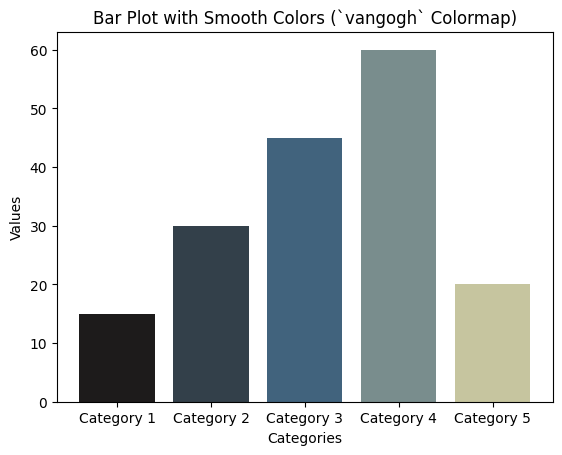

In [7]:
# example bar plot with a discrete colormap
categories = ['Category 1', 'Category 2', 'Category 3', 'Category 4', 'Category 5']
values = [15, 30, 45, 60, 20]

colors = vangogh_mpl(np.linspace(0, 1, len(categories)))
plt.bar(categories, values, color=colors)
plt.title(f'Bar Plot with Smooth Colors (`vangogh` Colormap)')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.show()

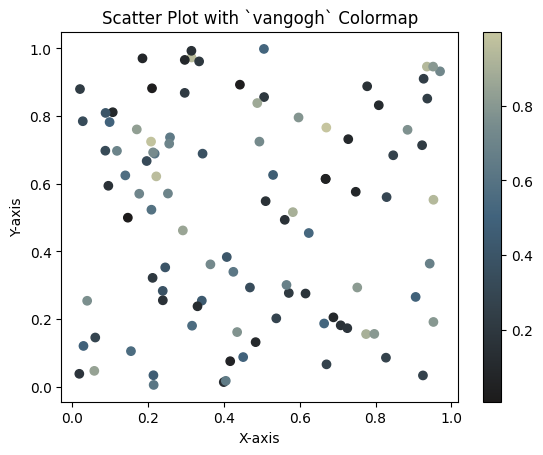

In [8]:
# example scatter plot with a sequential colormap
x = np.random.rand(100)
y = np.random.rand(100)
colors = np.random.rand(100)  # Defining colors based on data range
plt.scatter(x, y, c=colors, cmap=vangogh_mpl)
plt.colorbar()
plt.title('Scatter Plot with `vangogh` Colormap')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

### seaborn

In [9]:
vangogh_sns = convert_to_cmap(f'images/{fname}', library='seaborn')

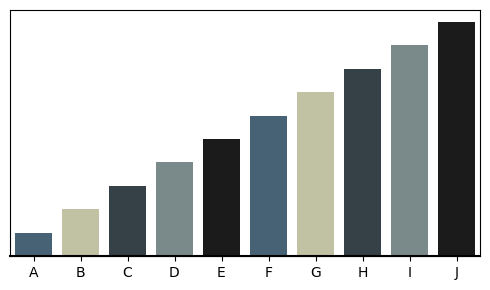

In [10]:
# example bar plot with a discrete colormap- https://seaborn.pydata.org/examples/palette_choices.html
f, ax = plt.subplots(1, 1, figsize=(5, 3))

rs = np.random.RandomState(8)
# Generate some sequential data
x = np.array(list("ABCDEFGHIJ"))
y = np.arange(1, 11)
sns.barplot(x=x, y=y, hue=x, palette=vangogh_sns, ax=ax)
ax.axhline(0, color="k", clip_on=False)

plt.setp(f.axes, yticks=[])
plt.tight_layout()


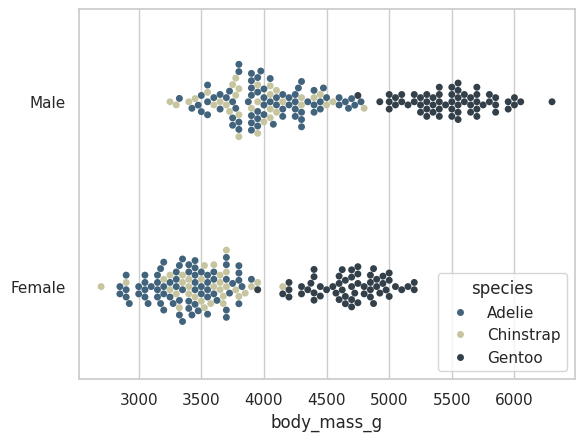

In [11]:
# example scatterplot with dicrete colormap - https://seaborn.pydata.org/examples/scatterplot_categorical.html

sns.set_theme(style="whitegrid", palette=vangogh_sns)
df = sns.load_dataset("penguins")

# Draw a categorical scatterplot to show each observation
ax = sns.swarmplot(data=df, 
                   x="body_mass_g",
                   y="sex",
                   hue="species")
ax.set(ylabel="")
plt.show()


### Plotly

In [12]:
vangogh_px = convert_to_cmap(f'images/{fname}', library='plotly')

In [13]:
# example scatter plot with discrete colormap - https://plotly.com/python/line-and-scatter/
df = px.data.iris()
fig = px.scatter(df,
                 x="sepal_width",
                 y="sepal_length",
                 color="species",
                 color_discrete_sequence=vangogh_px)
fig.show()

In [14]:
# example heatmap with continuous colormap - https://plotly.com/python/colorscales/
data = [[1, .3, .5, .9],
        [.3, .1, .4, 1],
        [.2, .8, .9, .3]]
# using a reversed cmap here since easier to visualize
fig = px.imshow(data, color_continuous_scale=vangogh_px[::-1])
fig.show()

In [15]:
# example bar plot with discrete colormap : https://plotly.com/python/bar-charts/
df = px.data.medals_long()
# add some example data to increase color palette
df2 = pd.DataFrame([['Antarctica', 'gold', 10]], columns=['nation','medal','count'])
df3 = pd.DataFrame([['Atlantis', 'bronze', 4]], columns=['nation','medal','count'])
df = pd.concat([df, df2, df3])

fig = px.bar(df,
             x="medal",
             y="count",
             color="nation",
             color_discrete_sequence=vangogh_px)
fig.show()


## (TODO)
1. Package with pre-existing common cmaps
2. Generate example plot with different colormap displays
3. Write README